## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

## Load the data

In [2]:
df = pd.read_csv('../Dataset/rows.csv')

In [3]:
#read the first 5 rows of data
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056)
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005)
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076)
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006)
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003)


In [4]:
#read the last 5 rows of data
df.tail()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
23563,216936948,08/21/2020,02:10:00,BRONX,48,0.0,MULTI DWELL - APT BUILD,True,NaN,NaN,NaN,45-64,M,BLACK HISPANIC,1007277,187698,40.681843,-73.916978,POINT (-73.91697825799997 40.681842679000056)
23564,214926175,07/03/2020,23:49:00,QUEENS,102,0.0,HOTEL/MOTEL,False,<18,M,BLACK,<18,M,BLACK,1005993,241333,40.829060,-73.921434,POINT (-73.92143424399995 40.82906028200006)
23565,220870730,11/21/2020,08:05:00,BROOKLYN,60,0.0,NaN,True,NaN,NaN,NaN,45-64,M,WHITE,1046405,187113,40.680049,-73.775909,POINT (-73.77590919399995 40.680048726000045)
23566,208187330,01/18/2020,01:00:00,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,45-64,M,BLACK,1011373,182202,40.666746,-73.902232,POINT (-73.90223237399994 40.66674580000005)
23567,220848244,11/21/2020,15:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,999475,172871,40.641163,-73.945142,POINT (-73.94514161199999 40.64116269600004)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23568 entries, 0 to 23567
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             23568 non-null  int64  
 1   OCCUR_DATE               23568 non-null  object 
 2   OCCUR_TIME               23568 non-null  object 
 3   BORO                     23568 non-null  object 
 4   PRECINCT                 23568 non-null  int64  
 5   JURISDICTION_CODE        23566 non-null  float64
 6   LOCATION_DESC            9987 non-null   object 
 7   STATISTICAL_MURDER_FLAG  23568 non-null  bool   
 8   PERP_AGE_GROUP           15109 non-null  object 
 9   PERP_SEX                 15143 non-null  object 
 10  PERP_RACE                15143 non-null  object 
 11  VIC_AGE_GROUP            23568 non-null  object 
 12  VIC_SEX                  23568 non-null  object 
 13  VIC_RACE                 23568 non-null  object 
 14  X_COORD_CD            

## Visualise the data

In [5]:
df['VIC_SEX'].value_counts()

M    21353
F     2195
U       20
Name: VIC_SEX, dtype: int64

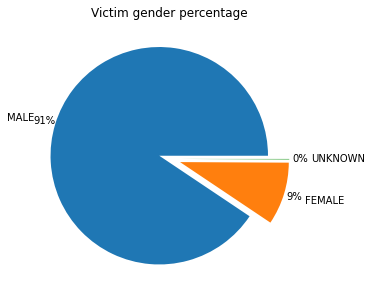

In [146]:
fig = plt.figure(figsize =(8, 5))
plt.pie(df['VIC_SEX'].value_counts(), labels = ['MALE', 'FEMALE', 'UNKNOWN'], autopct='%1.0f%%', 
        pctdistance=1.1, labeldistance=1.2, explode=[0.1,0.1,0.1])
plt.title('Victim gender percentage')
plt.show()

Majority of the victims are male at 21353 followed by female at 2195. There are also about 0.01% unknown values

In [7]:
df['PERP_SEX'].value_counts()

M    13305
U     1504
F      334
Name: PERP_SEX, dtype: int64

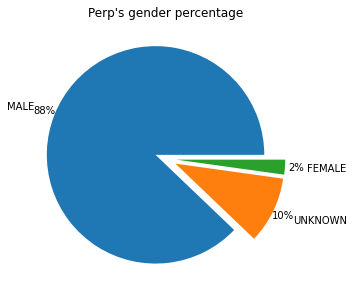

In [148]:
fig = plt.figure(figsize =(8, 5))
plt.pie(df['PERP_SEX'].value_counts(), labels = ['MALE', 'UNKNOWN', 'FEMALE'], autopct='%1.0f%%', 
        pctdistance=1.1, labeldistance=1.2, explode=[0.1,0.1,0.1])
plt.title('Perp\'s gender percentage')
plt.show()

13305 perps are male, and 334 are female but the unknown value is quite high at 1504 

From the above two graphs related to sex of victim and perp, it can be concluded that males are often the victim and perp for shooting in NYC. Another interesting fact is that, according to states101.com there are more females than males in NYC but yet the number of males involved in these shooting are staggeringly higher especially the perps.

In [9]:
df['VIC_AGE_GROUP'].value_counts()

25-44      10287
18-24       9000
<18         2525
45-64       1536
65+          155
UNKNOWN       65
Name: VIC_AGE_GROUP, dtype: int64

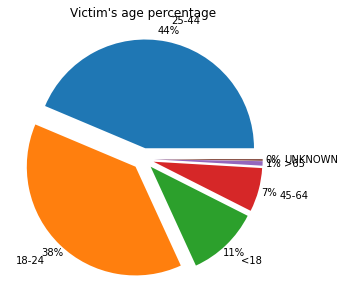

In [150]:
fig = plt.figure(figsize =(8, 5))
plt.pie(df['VIC_AGE_GROUP'].value_counts(), labels = ['25-44', '18-24', '<18', '45-64', '>65', 'UNKNOWN'], autopct='%1.0f%%', 
        pctdistance=1.1, labeldistance=1.2, explode=[0.1,0.1,0.1, 0.1,0.1,0.1])
plt.title('Victim\'s age percentage')

plt.show()

In [11]:
n = df['PERP_AGE_GROUP'].value_counts()[:-3]
n

18-24      5448
25-44      4613
UNKNOWN    3156
<18        1354
45-64       481
65+          54
Name: PERP_AGE_GROUP, dtype: int64

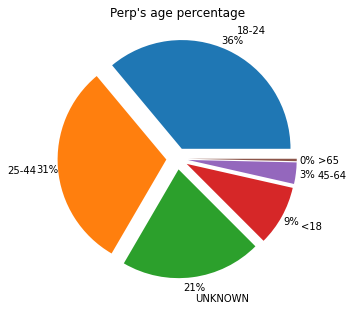

In [151]:
fig = plt.figure(figsize =(8, 5))
plt.pie(n, labels = ['18-24', '25-44', 'UNKNOWN','<18', '45-64', '>65'], autopct='%1.0f%%', 
        pctdistance=1.1, labeldistance=1.2, explode=[0.1,0.1,0.1, 0.1,0.1,0.1])
plt.title('Perp\'s age percentage')
plt.show()

From the above two graphs about ages, we can say that the age range of 25-44 have the most victims whereas the age range of 18-24 followed by 25-44 have the most number of perps.

In [13]:
df['VIC_RACE'].value_counts()

BLACK                             16846
WHITE HISPANIC                     3432
BLACK HISPANIC                     2244
WHITE                               615
ASIAN / PACIFIC ISLANDER            320
UNKNOWN                             102
AMERICAN INDIAN/ALASKAN NATIVE        9
Name: VIC_RACE, dtype: int64

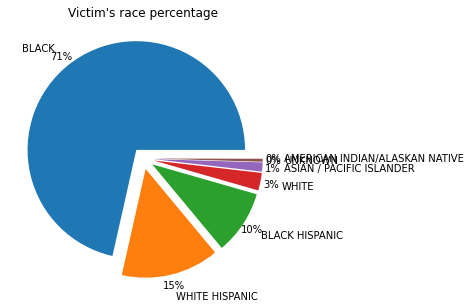

In [152]:
fig = plt.figure(figsize =(8, 5))
plt.pie(df['VIC_RACE'].value_counts(), labels = ['BLACK', 'WHITE HISPANIC', 'BLACK HISPANIC','WHITE', 'ASIAN / PACIFIC ISLANDER'
,'UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, 
explode=[0.1,0.1,0.1, 0.1,0.1,0.1,0.1])
plt.title('Victim\'s race percentage')
plt.show()

More than 50% of victims of shooting are black, followed by white hispanic and black hispanic and then white.

In [15]:
df['PERP_RACE'].value_counts()

BLACK                             9855
WHITE HISPANIC                    1961
UNKNOWN                           1869
BLACK HISPANIC                    1081
WHITE                              255
ASIAN / PACIFIC ISLANDER           120
AMERICAN INDIAN/ALASKAN NATIVE       2
Name: PERP_RACE, dtype: int64

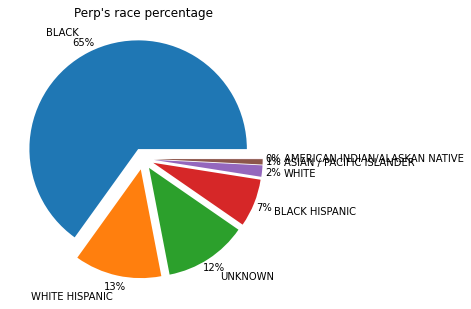

In [153]:
fig = plt.figure(figsize =(8, 5))
plt.pie(df['PERP_RACE'].value_counts(),labels = ['BLACK', 'WHITE HISPANIC', 'UNKNOWN','BLACK HISPANIC','WHITE', 
                                                 'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE'], autopct='%1.0f%%', 
        pctdistance=1.1, labeldistance=1.2, explode=[0.1,0.1,0.1, 0.1,0.1,0.1,0.1])
plt.title('Perp\'s race percentage')
plt.show()

More than 50% of perps are black followed by white hispanic, black hispanic and then white. (Although about 12% of the values are unknown)

From the above two race charts we can conclude that the black race have the most number of perps and victims. An interesting observation here is that according to wikipedia almost 45% of NYC's popultion is white, yet there are so few white victims and perps, where as the black population in NYC is about 26%.

In [126]:
flag = df['STATISTICAL_MURDER_FLAG'].value_counts()

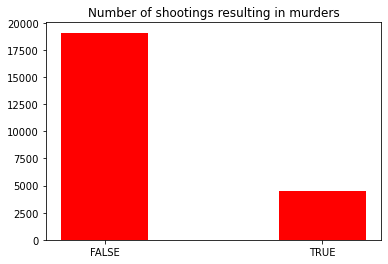

Percentage of shootings which result in murder: 19.042769857433807%


In [154]:
plt.bar(['FALSE', 'TRUE'],flag, color ='red',width = 0.4)
plt.title('Number of shootings resulting in murders')
plt.show()
print(f'Percentage of shootings which result in murder: {flag[1]/(flag[0]+flag[1])*100}%')

In [19]:
loc = df['LOCATION_DESC'].value_counts()
loc_list = []
loc_list = loc.index

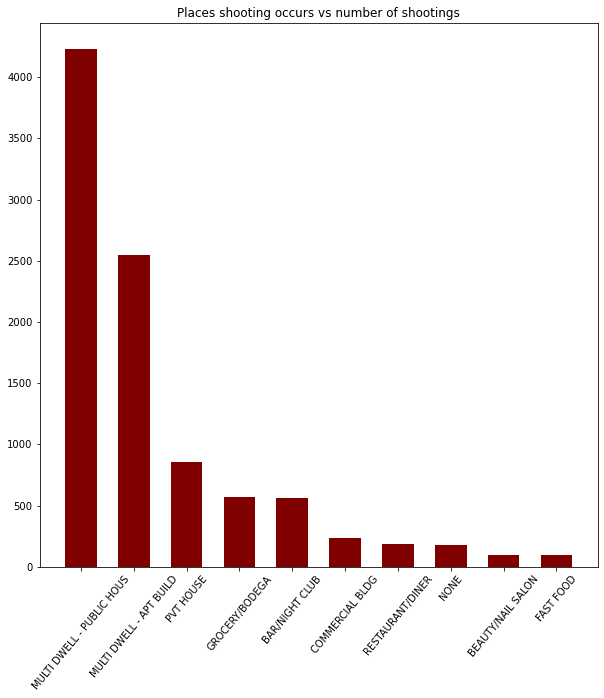

In [155]:
fig = plt.figure(figsize =(10, 10))
plt.bar(loc_list[:10],loc[:10], color ='maroon',width = 0.6)
plt.xticks(rotation=50)
plt.title('Places shooting occurs vs number of shootings')
plt.show()

The above graph shows us the top 10 kind of places where such shooting occur the most. Multi dwell - public house and apartment buildings are the places where such crimes occur the most

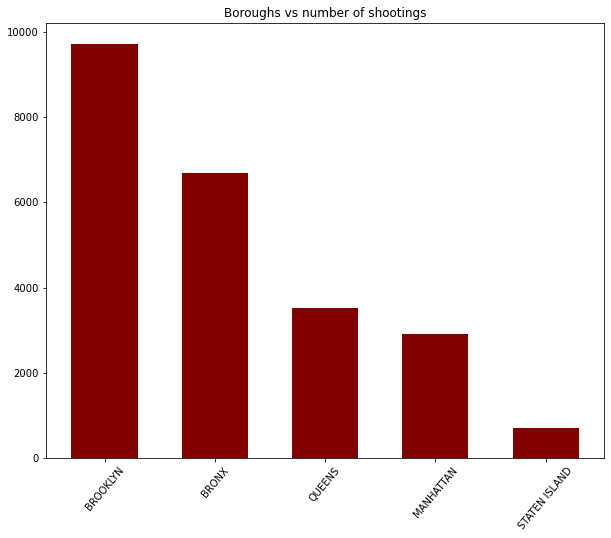

In [156]:
boro = df['BORO'].value_counts()
fig = plt.figure(figsize =(10, 8))
plt.bar(boro.index,boro, color ='maroon',width = 0.6)
plt.xticks(rotation=50)
plt.title('Boroughs vs number of shootings')
plt.show()

Brooklyn is the borough where the highest number of shootings take place.

In [25]:
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])
df['OCCUR_HOUR'] = pd.to_datetime(df['OCCUR_TIME'],format= '%H:%M:%S' ).dt.hour
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,OCCUR_HOUR
0,201575314,2019-08-23,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),22
1,205748546,2019-11-27,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005),15
2,193118596,2019-02-02,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076),19
3,204192600,2019-10-24,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006),0
4,201483468,2019-08-22,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003),18


In [26]:
months = df['OCCUR_DATE'].dt.month
months = months.value_counts().sort_index()

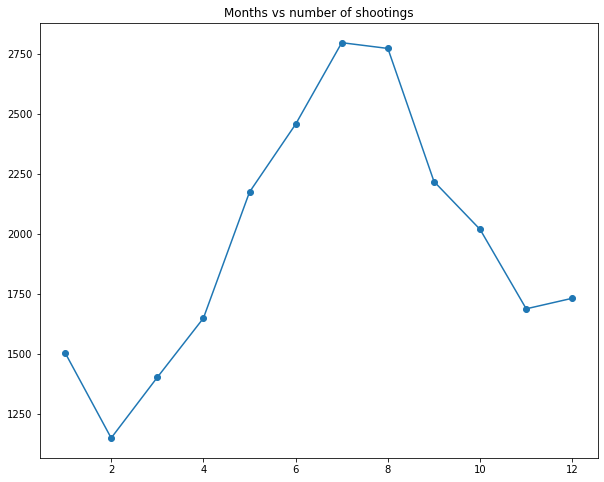

In [157]:
fig = plt.figure(figsize =(10, 8))
plt.plot(months.index, months, marker='o')
plt.title('Months vs number of shootings')
plt.show()

Number of shooting increase from Febuary till July, then it reaches its peak at July and August and then starts decreasing till it reaches its lowest in Febuary.

In [61]:
hours = df['OCCUR_HOUR'].value_counts().sort_index()

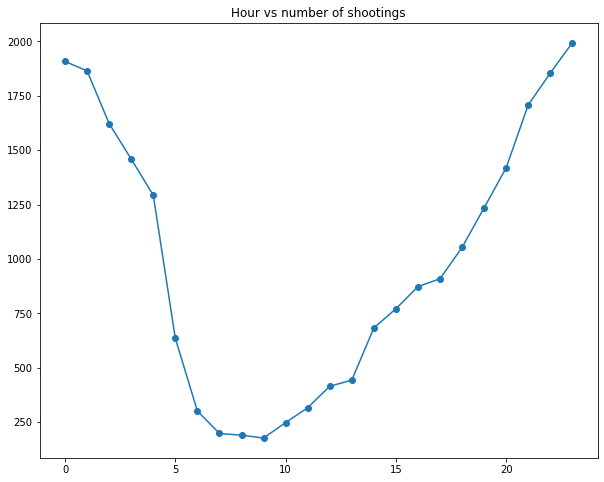

In [158]:
fig = plt.figure(figsize =(10, 8))
plt.plot(hours.index, hours, marker='o')
plt.title('Hour vs number of shootings')
plt.show()

The number of shootings is at its highest at night at around midnight, then it decreases and is at its lowest at between 7-9 am 

In [30]:
year = df['OCCUR_DATE'].dt.year
year.value_counts()

2006    2055
2008    1958
2020    1942
2011    1939
2010    1910
2007    1887
2009    1828
2012    1717
2014    1464
2015    1434
2013    1339
2016    1208
2017     969
2019     967
2018     951
Name: OCCUR_DATE, dtype: int64

In [31]:
year = year.astype(dtype=str).value_counts()
year

2006    2055
2008    1958
2020    1942
2011    1939
2010    1910
2007    1887
2009    1828
2012    1717
2014    1464
2015    1434
2013    1339
2016    1208
2017     969
2019     967
2018     951
Name: OCCUR_DATE, dtype: int64

In [32]:
year.index

Index(['2006', '2008', '2020', '2011', '2010', '2007', '2009', '2012', '2014',
       '2015', '2013', '2016', '2017', '2019', '2018'],
      dtype='object')

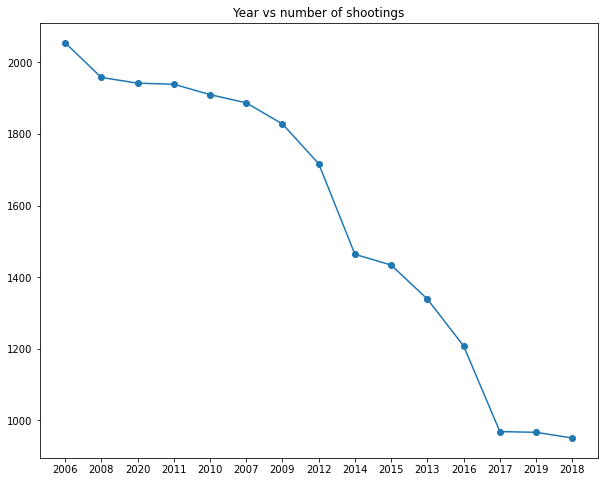

In [159]:
fig = plt.figure(figsize =(10, 8))
plt.plot(year.index, year, marker='o')
plt.title('Year vs number of shootings')
plt.show()

The chart shows that the number of shootings has decreased significantly since 2006, becoming less than 1000 in 2019

In [39]:
geo = df[['Latitude', 'Longitude']]
geo.head()

,Latitude,Longitude
0,40.697805,-73.808141
1,40.818700,-73.918571
2,40.791916,-73.945480
3,40.638064,-74.166108
4,40.854547,-73.913339


In [43]:
Bbox = ((geo.Longitude.min(), geo.Longitude.max(), geo.Latitude.min(), geo.Latitude.max()))
Bbox

(-74.24930372699998, -73.70204752099994, 40.51158633800003, 40.91081894500008)

In [1]:
# import street map
street_map = gpd.read_file('geo_export_8baeda74-84a5-4b4b-bff7-21c017e63bcd.shp')

In [2]:
gpd.__version__

'0.10.2'

In [52]:
# designate coordinate system
crs = {'init':'epsg:3857'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

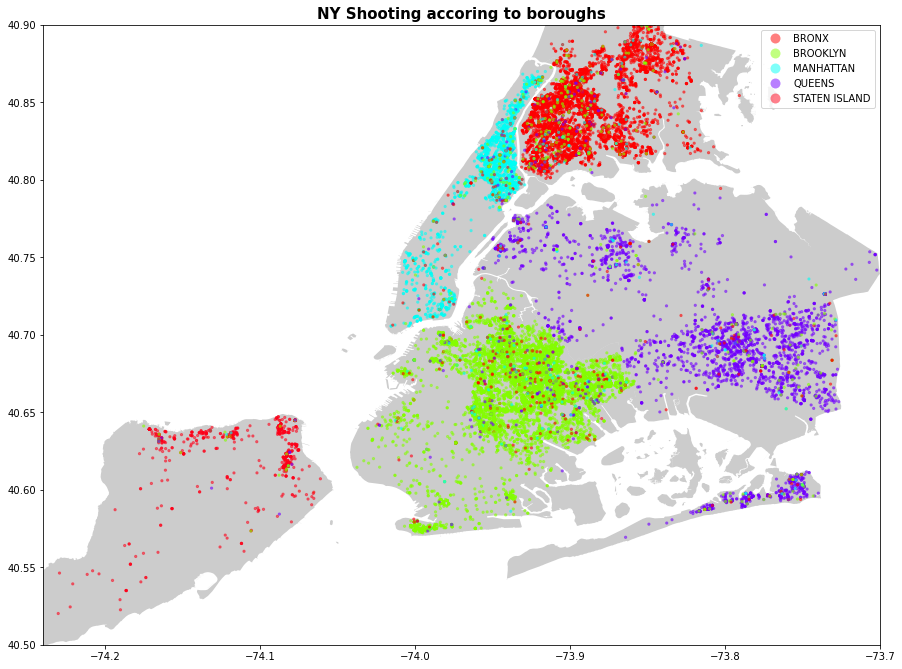

In [132]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='BORO',ax=ax,alpha=0.5, legend=True,markersize=5, cmap='hsv')
# add title to graph
plt.title('NY Shooting accoring to boroughs', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.24,-73.70)
plt.ylim( 40.5,40.9)
# show map
plt.show()

From the above map we can see that the highest concentration of shootings occured in Brooklyn followed by Bronx.

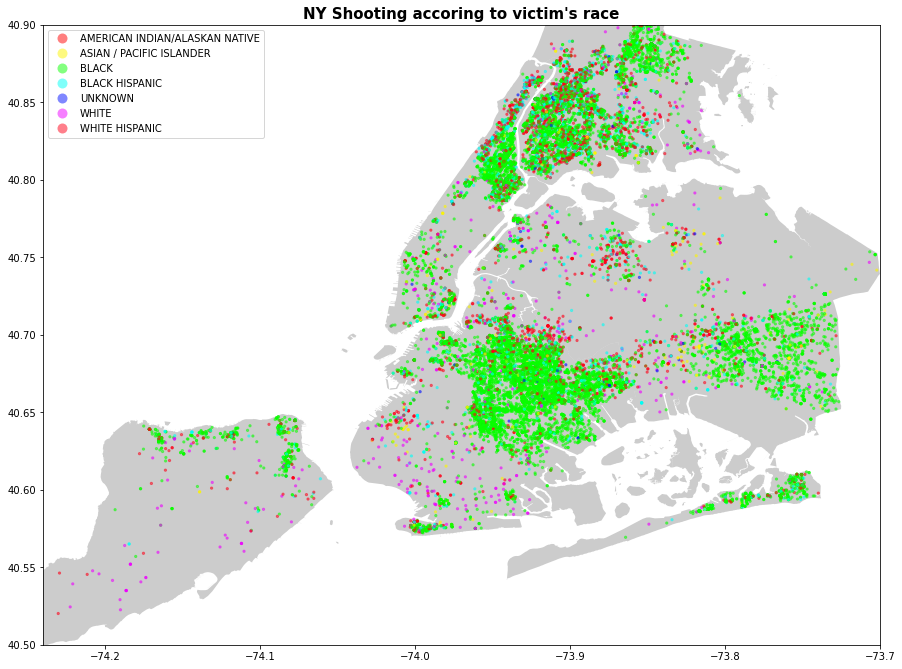

In [160]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='VIC_RACE',ax=ax,alpha=0.5, legend=True,markersize=5, cmap='hsv')
plt.title('NY Shooting accoring to victim\'s race', fontsize=15,fontweight='bold')
plt.xlim(-74.24,-73.70)
plt.ylim( 40.5,40.9)
# show map
plt.show()

The above map shows us the victim's race and we can observe that in Brooklyn, Queens and northern Manhattan, majority of the victims are black and in Bronx, while there are a lot of black victims, victims of other races are also present.

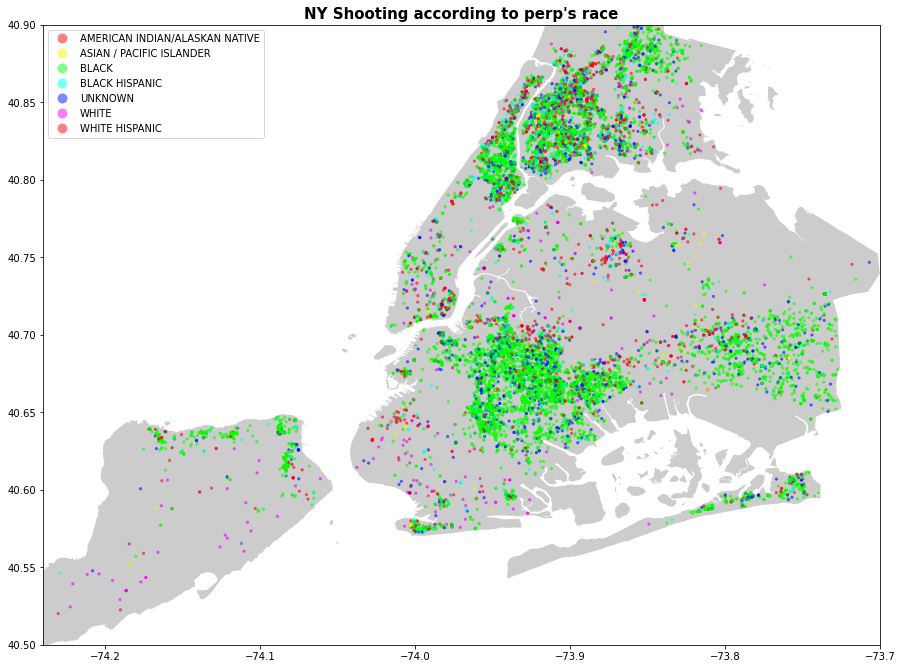

In [141]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='PERP_RACE',ax=ax,alpha=0.5, legend=True,markersize=5, cmap='hsv')
plt.title('NY Shooting according to perp\'s race', fontsize=15,fontweight='bold')
plt.xlim(-74.24,-73.70)
plt.ylim( 40.5,40.9)
# show map
plt.show()

As we can see the concentration of green dots (black perps) are not as high as in the previous map, a lot more coloured dots are present alongside green ones.